In [ ]:
# Installs a CUDA version compatible with tensorflow on COLAB
!apt update && apt install cuda-11-8

# Install the latest DeepLabCut version:
!pip install "deeplabcut[tf, gui]"

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,920 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,358 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/restricte

In [ ]:
import deeplabcut
import os
#import zipfile
#import shutil
from google.colab import drive

drive.mount('/content/drive')
project_path = "/content/drive/MyDrive/IZSVE/Prova_Video_Rachele-Tommy-2024-03-19"
config_path = os.path.join(project_path, "config.yaml")

videos_directory = os.path.join(project_path, "videos")
videos_in_directory = os.listdir(videos_directory)
video_extensions = ['.mp4', '.avi', '.mov']
video_files = [file for file in videos_in_directory if any(file.endswith(ext) for ext in video_extensions)]

Loading DLC 2.3.9...
Mounted at /content/drive


In [ ]:
#Util to downlad a screenshot of the project
# Ho usato questa funzione per salvare il progetto dopo il training ma può essere usato dopo un qualsiasi
# punto visto che il folder "current_project" contiene tutte le info necessarie

def zip_folder(folder_path, output_path):
    """
    Compresses the contents of a folder into a zip file.

    Args:
    - folder_path: Path to the folder to be zipped.
    - output_path: Path to save the zip file.
    """
    with zipfile.ZipFile(output_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                zipf.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), os.path.join(folder_path, '..')))

# Example usage:
#folder_to_zip = '/content/my_folder'  # Change this to the path of the folder you want to zip
#zip_output_path = '/content/my_folder.zip'  # Change this to the desired path for the zip file

#zip_folder(folder_to_zip, zip_output_path)

# Download the zip file
#files.download(zip_output_path)

In [ ]:
# Aggiunge video al progetto
#Non c'è bisogno di settare copy_videos=True visto che gli stiamo già dando il path dentro il quale copierebbe i video
# Ora che ci penso non è necessario nemmeno aggiungerli visto che sto copiando da directory locale un progetto già fatto
#deeplabcut.add_new_videos(config_path, video_files, copy_videos=False)

**IMPORTANTE**

Modifica il file `config.yaml` ora

In [ ]:
# Estrae i frames dal/i video (già fatto nel progetto corrente attraverso GUI)
    # è bene usare crop=True  poiché il training non scala efficientemente con frame size troppo grandi
    # userfeedback=True permette di visionare i video per controllare siano quelli giusti
    # mode=manual permette di estrarre a mano i frames
#deeplabcut.extract_frames(config_path, mode='automatic/manual', algo='uniform/kmeans', userfeedback=False, crop=True/False)

In [ ]:
# Accede alla GUI per il frame labelling
#deeplabcut.label_frames(config_path)

In [ ]:
deeplabcut.check_labels(config_path, visualizeindividuals=True)

Creating images with labels by Tommy.


100%|██████████| 20/20 [00:12<00:00,  1.63it/s]

If all the labels are ok, then use the function 'create_training_dataset' to create the training dataset!


In [ ]:
# Crea il training dataset
#Per qualche motivo le 'resnet' non vengono downloadate correttamente
#Funziona invece efficientnet-b0
deeplabcut.create_multianimaltraining_dataset(config_path, net_type='resnet_50')

Utilizing the following graph: [[0, 1], [0, 2], [1, 2]]
Creating training data for: Shuffle: 1 TrainFraction:  0.95


100%|██████████| 19/19 [00:00<00:00, 206.19it/s]


The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


**IMPORTANTE**

Editare, se necessario, il file `pose_cfg.yaml`.

Ad esempio: se non si vuole downloadare da capo i pesi inizializzati da `tensorflow`, si può specificare il path al file `.ckpt` attraverso la variabile `init_weights`.

In [ ]:
# Train the Network
deeplabcut.train_network(config_path, allow_growth=True, saveiters=15000 , maxiters=50000)

Selecting multi-animal trainer


Config:
{'all_joints': [[0], [1], [2]],
 'all_joints_names': ['Nose', 'TailStart', 'TailEnd'],
 'alpha_r': 0.02,
 'apply_prob': 0.5,
 'batch_size': 8,
 'contrast': {'clahe': True,
              'claheratio': 0.1,
              'histeq': True,
              'histeqratio': 0.1},
 'convolution': {'edge': False,
                 'emboss': {'alpha': [0.0, 1.0], 'strength': [0.5, 1.5]},
                 'embossratio': 0.1,
                 'sharpen': False,
                 'sharpenratio': 0.3},
 'crop_pad': 0,
 'crop_sampling': 'hybrid',
 'crop_size': [400, 400],
 'cropratio': 0.4,
 'dataset': 'training-datasets/iteration-0/UnaugmentedDataSet_Prova_Video_RacheleMar19/Prova_Video_Rachele_Tommy95shuffle1.pickle',
 'dataset_type': 'multi-animal-imgaug',
 'decay_steps': 30000,
 'deterministic': False,
 'display_iters': 500,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': '/usr/local/lib/python3.10/dist-packages/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ck

Activating limb prediction...
Batch Size is 8
Getting specs multi-animal-imgaug 3 3
Loading ImageNet-pretrained resnet_50
Max_iters overwritten as 50000
Save_iters overwritten as 15000
Training parameters:
{'stride': 8.0, 'weigh_part_predictions': False, 'weigh_negatives': False, 'fg_fraction': 0.25, 'mean_pixel': [123.68, 116.779, 103.939], 'shuffle': True, 'snapshot_prefix': '/content/drive/MyDrive/IZSVE/Prova_Video_Rachele-Tommy-2024-03-19/dlc-models/iteration-0/Prova_Video_RacheleMar19-trainset95shuffle1/train/snapshot', 'log_dir': 'log', 'global_scale': 0.8, 'location_refinement': True, 'locref_stdev': 7.2801, 'locref_loss_weight': 0.05, 'locref_huber_loss': True, 'optimizer': 'adam', 'intermediate_supervision': False, 'intermediate_supervision_layer': 12, 'regularize': False, 'weight_decay': 0.0001, 'crop_pad': 0, 'scoremap_dir': 'test', 'batch_size': 8, 'dataset_type': 'multi-animal-imgaug', 'deterministic': False, 'mirror': False, 'pairwise_huber_loss': False, 'weigh_only_prese

iteration: 500 loss: 0.0366 scmap loss: 0.0321 locref loss: 0.0012 limb loss: 0.0034 lr: 0.0001
iteration: 1000 loss: 0.0153 scmap loss: 0.0142 locref loss: 0.0003 limb loss: 0.0008 lr: 0.0001
iteration: 1500 loss: 0.0112 scmap loss: 0.0104 locref loss: 0.0002 limb loss: 0.0006 lr: 0.0001
iteration: 2000 loss: 0.0097 scmap loss: 0.0090 locref loss: 0.0002 limb loss: 0.0005 lr: 0.0001
iteration: 2500 loss: 0.0086 scmap loss: 0.0080 locref loss: 0.0002 limb loss: 0.0004 lr: 0.0001
iteration: 3000 loss: 0.0081 scmap loss: 0.0076 locref loss: 0.0002 limb loss: 0.0004 lr: 0.0001
iteration: 3500 loss: 0.0076 scmap loss: 0.0071 locref loss: 0.0001 limb loss: 0.0004 lr: 0.0001
iteration: 4000 loss: 0.0072 scmap loss: 0.0068 locref loss: 0.0001 limb loss: 0.0003 lr: 0.0001
iteration: 4500 loss: 0.0070 scmap loss: 0.0065 locref loss: 0.0001 limb loss: 0.0004 lr: 0.0001
iteration: 5000 loss: 0.0067 scmap loss: 0.0063 locref loss: 0.0001 limb loss: 0.0003 lr: 0.0001
iteration: 5500 loss: 0.0067 sc

**maDeepLabCut CRITICAL POINT:**

For multi-animal projects we are using not only different and new output layers, but also new data augmentation, optimization, learning rates, and batch training defaults. Thus, please use a lower save_iters and maxiters. I.e. we suggest saving every 10K-15K iterations, and only training until 50K-100K iterations. We recommend you look closely at the loss to not overfit on your data. The bonus, training time is much less!!!

Running  DLC_resnet50_Prova_Video_RacheleMar19shuffle1_45000  with # of trainingiterations: 45000


/usr/local/lib/python3.10/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


Activating extracting of PAFs
Network Evaluation underway...


0it [00:00, ?it/s]/usr/local/lib/python3.10/dist-packages/deeplabcut/pose_estimation_tensorflow/core/evaluate_multianimal.py:366: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  temp["bodyparts"].replace(
/usr/local/lib/python3.10/dist-packages/deeplabcut/pose_estimation_tensorflow/core/evaluate_multianimal.py:366: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior,

Results for 45000 training iterations, training fraction of 95, and shuffle 1:
Train error: 2.29 pixels. Test error: 5.02 pixels.
With pcutoff of 0.6:
Train error: 2.29 pixels. Test error: 5.02 pixels.
##########################################
Average Euclidean distance to GT per individual (in pixels; test-only)
individuals
Individual10         NaN
Individual11    5.659187
Individual12    6.214567
Individual13         NaN
Individual4     9.774206
Individual5     4.118774
Individual6          NaN
Individual7     0.865461
Individual8     2.283379
Individual9     3.305147
individual1     4.465775
individual2     8.347749
individual3     2.075269
Average Euclidean distance to GT per bodypart (in pixels; test-only)
bodyparts
Nose         4.052996
TailEnd      8.661049
TailStart    4.831932
Done and results stored for snapshot:  snapshot-45000
Selecting best skeleton...
Graph 1|2


100%|██████████| 20/20 [00:00<00:00, 1716.83it/s]

Graph 2|2



100%|██████████| 20/20 [00:00<00:00, 1182.68it/s]


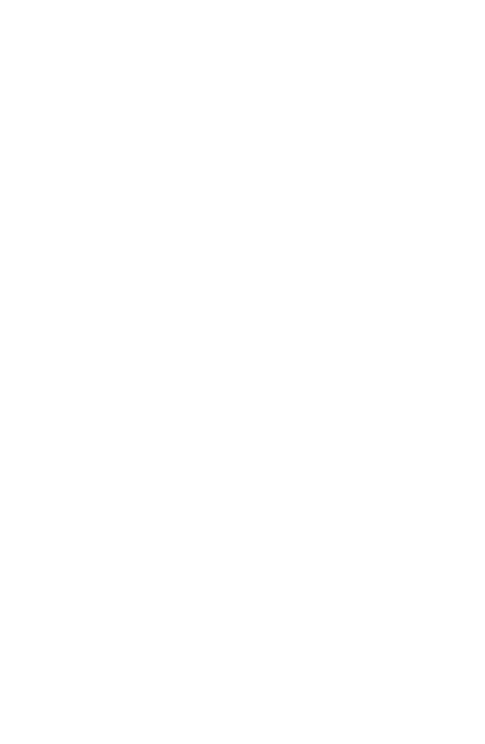

In [ ]:
# Network evaluation
# questa funzione fa ancora uso della GPU
deeplabcut.evaluate_network(config_path, plotting=True)

In [ ]:
#You should also plot the scoremaps, locref layers, and PAFs to assess performance
deeplabcut.extract_save_all_maps(config_path, Indices=[0, 5])

/usr/local/lib/python3.10/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


Activating extracting of PAFs
Analyzing data...


2it [00:07,  3.64s/it]


Saving plots...


100%|██████████| 2/2 [00:03<00:00,  1.87s/it]


——————– DECISION POINT ——————-

ATTENTION! Pose estimation and tracking should be thought of as separate steps. If you do not have good pose estimation evaluation metrics at this point, stop, check original labels, add more data, etc –> don’t move forward with this model. If you think you have a good model, please test the “raw” pose estimation performance on a video to validate performance:

In [ ]:
scorername = deeplabcut.analyze_videos(config_path,['/content/drive/MyDrive/IZSVE/Prova_Video_Rachele-Tommy-2024-03-19/videos/Video_Rachele_testing_deeplabcut.mp4'])
deeplabcut.create_video_with_all_detections(config_path, ['/content/drive/MyDrive/IZSVE/Prova_Video_Rachele-Tommy-2024-03-19/videos/Video_Rachele_testing_deeplabcut.mp4'], videotype='.mp4')

Using snapshot-45000 for model /content/drive/MyDrive/IZSVE/Prova_Video_Rachele-Tommy-2024-03-19/dlc-models/iteration-0/Prova_Video_RacheleMar19-trainset95shuffle1


/usr/local/lib/python3.10/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


Activating extracting of PAFs
Starting to analyze %  /content/drive/MyDrive/IZSVE/Prova_Video_Rachele-Tommy-2024-03-19/videos/Video_Rachele_testing_deeplabcut.mp4
Loading  /content/drive/MyDrive/IZSVE/Prova_Video_Rachele-Tommy-2024-03-19/videos/Video_Rachele_testing_deeplabcut.mp4
Duration of video [s]:  291.5 , recorded with  30.0 fps!
Overall # of frames:  8745  found with (before cropping) frame dimensions:  478 850
Starting to extract posture from the video(s) with batchsize: 8


100%|██████████| 8745/8745 [05:43<00:00, 25.44it/s]


Video Analyzed. Saving results in /content/drive/MyDrive/IZSVE/Prova_Video_Rachele-Tommy-2024-03-19/videos...
Using snapshot-45000 for model /content/drive/MyDrive/IZSVE/Prova_Video_Rachele-Tommy-2024-03-19/dlc-models/iteration-0/Prova_Video_RacheleMar19-trainset95shuffle1
Processing...  /content/drive/MyDrive/IZSVE/Prova_Video_Rachele-Tommy-2024-03-19/videos/Video_Rachele_testing_deeplabcut.mp4
Analyzing /content/drive/MyDrive/IZSVE/Prova_Video_Rachele-Tommy-2024-03-19/videos/Video_Rachele_testing_deeplabcutDLC_resnet50_Prova_Video_RacheleMar19shuffle1_45000.h5


100%|██████████| 8745/8745 [00:08<00:00, 977.69it/s] 
8745it [00:06, 1279.85it/s]


The tracklets were created (i.e., under the hood deeplabcut.convert_detections2tracklets was run). Now you can 'refine_tracklets' in the GUI, or run 'deeplabcut.stitch_tracklets'.
Processing...  /content/drive/MyDrive/IZSVE/Prova_Video_Rachele-Tommy-2024-03-19/videos/Video_Rachele_testing_deeplabcut.mp4


100%|██████████| 54/54 [00:00<00:00, 1705.41it/s]
/usr/local/lib/python3.10/dist-packages/deeplabcut/refine_training_dataset/stitch.py:927: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  df.to_hdf(output_name, "tracks", format="table", mode="w")


The videos are analyzed. Time to assemble animals and track 'em... 
 Call 'create_video_with_all_detections' to check multi-animal detection quality before tracking.
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Creating labeled video for  Video_Rachele_testing_deeplabcut


100%|██████████| 8745/8745 [01:11<00:00, 122.53it/s]


Please note that you do not get the .h5/csv file you might be used to getting (this comes after tracking). You will get a pickle file that is used in `create_video_with_all_detections`. Another sanity check may be to examine the distributions of edge affinity costs using `deeplabcut.utils.plot_edge_affinity_distributions`. Easily separable distributions indicate that the model has learned strong links to group keypoints into distinct individuals — likely a necessary feature for the assembly stage (note that the amount of overlap will also depend on the amount of interactions between your animals in the daset). IF you have good clean out video, ending in ....full.mp4 (and the evaluation metrics look good, scoremaps look good, plotted evaluation images, and affinity distributions are far apart for most edges), then go forward!!!

If this does not look good, we recommend extracting and labeling more frames (even from more videos). Try to label close interactions of animals for best performance. Once you label more, you can create a new training set and train.

You can either:

extract more frames manually from existing or new videos and label as when initially building the training data set, or

let DeepLabCut find frames where keypoints were poorly detected and automatically extract those for you. All you need is to run:

`deeplabcut.find_outliers_in_raw_data(config_path, pickle_file, video_file)`
where pickle_file is the `_full.pickle` one obtains after video analysis. Flagged frames will be added to your collection of images in the corresponding labeled-data folders for you to label.

In [ ]:
deeplabcut.find_outliers_in_raw_data(config_path, pickle_file, video_file)

# Animal Assembly and Tracking across frames

IF auto_track = True:

NEW in 2.2.0.3+: deeplabcut.analyze_videos has a new argument auto_track=True, chaining pose estimation, tracking, and stitching in a single function call with defaults we found to work well. Thus, you’ll now get the .h5 file you might be used to getting in standard DLC. If auto_track=False, one must run convert_detections2tracklets and stitch_tracklets manually (see below), granting more control over the last steps of the workflow (ideal for advanced users).

In [ ]:
deeplabcut.analyze_videos(config_path, ['/fullpath/project/videos/'], videotype='.mp4', auto_track=True)

In [ ]:
deeplabcut.convert_detections2tracklets(config_path, ['/content/drive/MyDrive/IZSVE/Prova_Video_Rachele-Tommy-2024-03-19/videos/Video_Rachele_testing_deeplabcut.mp4'])

Using snapshot-45000 for model /content/drive/MyDrive/IZSVE/Prova_Video_Rachele-Tommy-2024-03-19/dlc-models/iteration-0/Prova_Video_RacheleMar19-trainset95shuffle1
Processing...  /content/drive/MyDrive/IZSVE/Prova_Video_Rachele-Tommy-2024-03-19/videos/Video_Rachele_testing_deeplabcut.mp4
Tracklets already computed /content/drive/MyDrive/IZSVE/Prova_Video_Rachele-Tommy-2024-03-19/videos/Video_Rachele_testing_deeplabcutDLC_resnet50_Prova_Video_RacheleMar19shuffle1_45000_el.pickle
Set overwrite = True to overwrite.
The tracklets were created (i.e., under the hood deeplabcut.convert_detections2tracklets was run). Now you can 'refine_tracklets' in the GUI, or run 'deeplabcut.stitch_tracklets'.


Now we can refine the tracklets or run...

In [ ]:
deeplabcut.stitch_tracklets(config_path, ['/content/drive/MyDrive/IZSVE/Prova_Video_Rachele-Tommy-2024-03-19/videos/Video_Rachele_testing_deeplabcut.mp4'], videotype='mp4',
                            shuffle=1, trainingsetindex=0)

Processing...  /content/drive/MyDrive/IZSVE/Prova_Video_Rachele-Tommy-2024-03-19/videos/Video_Rachele_testing_deeplabcut.mp4


100%|██████████| 54/54 [00:00<00:00, 446.84it/s]
/usr/local/lib/python3.10/dist-packages/deeplabcut/refine_training_dataset/stitch.py:927: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  df.to_hdf(output_name, "tracks", format="table", mode="w")
